# Data Collection

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

dataset is collected from https://www.kaggle.com/datasets/arjuntejaswi/plant-village

In [2]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    batch_size=32,
    image_size=(256,256)
)

Found 2152 files belonging to 3 classes.


In [3]:
class_names=dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [4]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)

(32, 256, 256, 3)


# Data Visualization

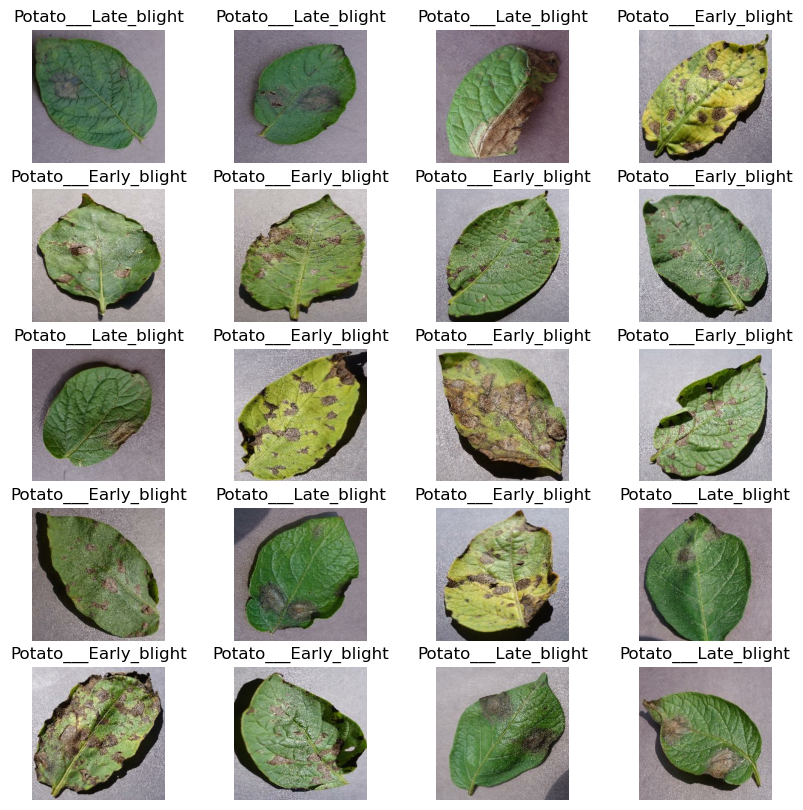

In [5]:
plt.figure(figsize=(10,10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(20):
        ax=plt.subplot(5,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

# Train Test Split

In [6]:
train_ds=dataset.take(54)
test_ds=dataset.skip(54)

In [7]:
val_ds=test_ds.take(6)
test_ds=test_ds.skip(6)

# Data Optimization(cache, shuffle, prefetch)

In [8]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

# Data Preprocessing

In [9]:
#normalization
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(256, 256),#it will take care of predicted image if it is not 256/256
  layers.experimental.preprocessing.Rescaling(1./255),
])

# Augmentation

In [10]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [11]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=30

# Model Building

In [12]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [13]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

In [14]:
#compiling the model
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [16]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=30,
)

Epoch 1/30
54/54 [==============================] - 166s 3s/step - loss: 0.9086 - accuracy: 0.4902 - val_loss: 0.9232 - val_accuracy: 0.4583
Epoch 2/30
54/54 [==============================] - 203s 4s/step - loss: 0.7609 - accuracy: 0.6152 - val_loss: 0.6378 - val_accuracy: 0.7448
Epoch 3/30
54/54 [==============================] - 150s 3s/step - loss: 0.4882 - accuracy: 0.7795 - val_loss: 0.3447 - val_accuracy: 0.8750
Epoch 4/30
54/54 [==============================] - 182s 3s/step - loss: 0.2949 - accuracy: 0.8814 - val_loss: 0.2618 - val_accuracy: 0.9010
Epoch 5/30
54/54 [==============================] - 150s 3s/step - loss: 0.2163 - accuracy: 0.9149 - val_loss: 0.3701 - val_accuracy: 0.8646
Epoch 6/30
54/54 [==============================] - 148s 3s/step - loss: 0.2404 - accuracy: 0.9045 - val_loss: 0.2199 - val_accuracy: 0.9219
Epoch 7/30
54/54 [==============================] - 176s 3s/step - loss: 0.1590 - accuracy: 0.9363 - val_loss: 0.1600 - val_accuracy: 0.9427
Epoch 8/30
54

In [17]:
scores = model.evaluate(test_ds)
scores

8/8 [==============================] - 9s 446ms/step - loss: 0.0525 - accuracy: 0.9828


[0.05250612646341324, 0.982758641242981]

In [18]:
history

In [19]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 54}

In [20]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [21]:
type(history.history['loss'])

list

In [22]:
len(history.history['loss'])

30

In [23]:
history.history['loss'][:5] # show loss for first 5 epochs

[0.908633828163147,
 0.7608819007873535,
 0.48824259638786316,
 0.2949204444885254,
 0.21629633009433746]

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

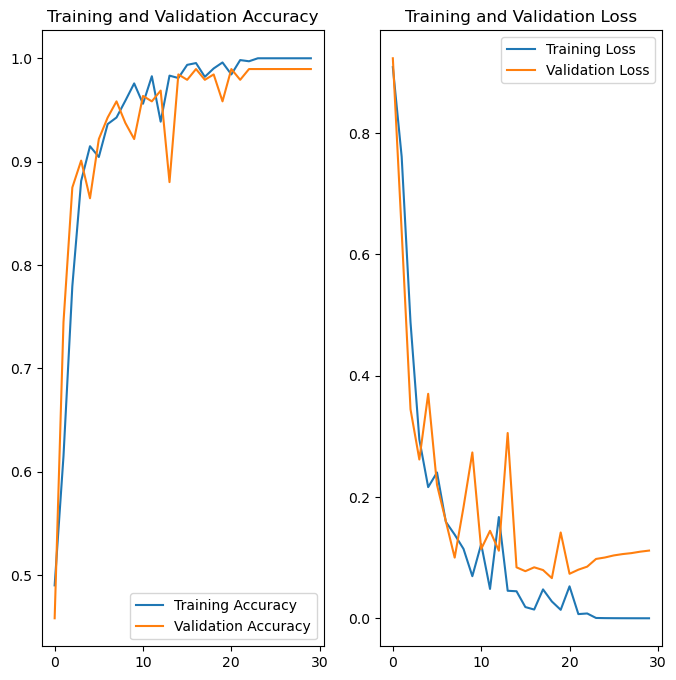

In [25]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [41]:
import numpy as np
from sklearn.metrics import roc_curve, auc, confusion_matrix
import seaborn as sns

# Get the model from history
model = history.model

# ROC Curve (One vs All)
def plot_roc_curve(model, test_dataset, class_names):
    plt.figure(figsize=(8, 8))
    y_test = []
    y_scores = []

    for images_batch, labels_batch in test_dataset:
        y_test.extend(labels_batch.numpy())
        y_scores.extend(model.predict(images_batch))

    y_test = np.array(y_test)
    y_scores = np.array(y_scores)

    for i in range(len(class_names)):
        fpr, tpr, _ = roc_curve((y_test == i).astype(int), y_scores[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{class_names[i]} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

# Confusion Matrix
def plot_confusion_matrix(model, test_dataset, class_names):
    y_true = []
    y_pred = []

    for images_batch, labels_batch in test_dataset:
        y_true.extend(labels_batch.numpy())
        predictions = model.predict(images_batch)
        y_pred.extend(np.argmax(predictions, axis=1))

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()



1/1 [==============================] - 0s 453ms/step


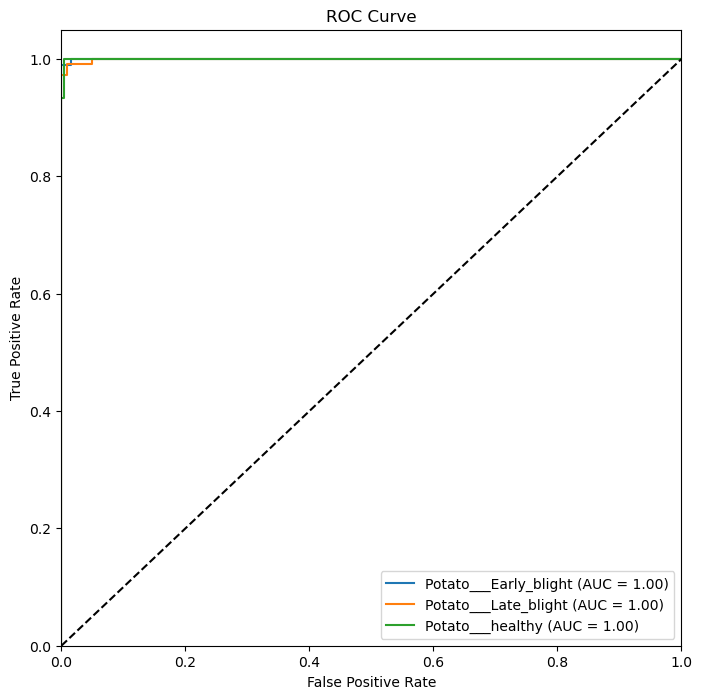

In [42]:
# Plot ROC Curve
plot_roc_curve(model, test_ds, class_names)

1/1 [==============================] - 1s 537ms/step


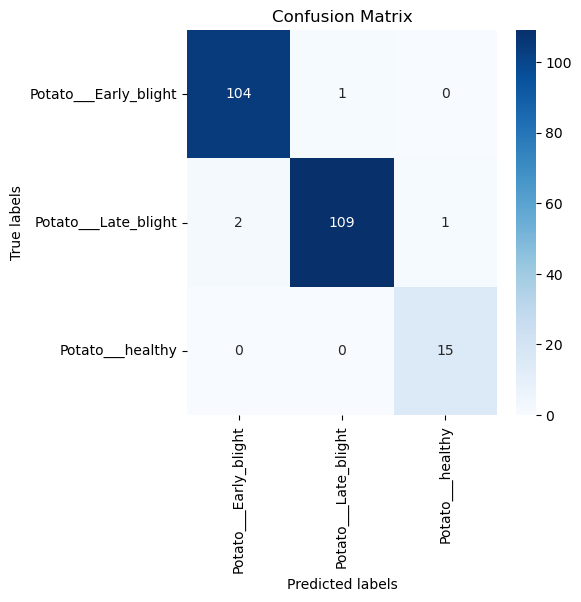

In [40]:
# Plot Confusion Matrix
plot_confusion_matrix(model, test_ds, class_names)

first image to predict
actual label: Potato___Late_blight
1/1 [==============================] - 1s 506ms/step
predicted label: Potato___Late_blight


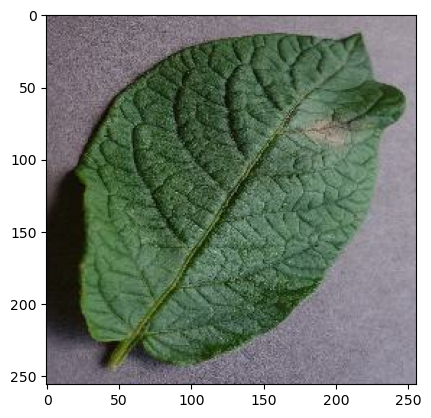

In [29]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])